<h1> Sentiment Analysis, Word Clouds, and Taylor Swift </h1>

<h4> Importing everything that will be needed </h4>

In [329]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, ImageColorGenerator
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from PIL import Image
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

<h4> Reading the CSVs into DataFrames for each album, saving the to variables names matching each album </h4>

In [330]:
taylor_swift = pd.read_csv(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\01-taylor_swift.csv")
fearless = pd.read_csv(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\02-fearless_taylors_version.csv")
speak_now = pd.read_csv(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\03-speak_now_deluxe_package.csv")
red = pd.read_csv(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\04-red_deluxe_edition.csv")
nineteen_eighty_nine = pd.read_csv(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\05-1989_deluxe.csv")
reputation = pd.read_csv(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\06-reputation.csv")
lover = pd.read_csv(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\07-lover.csv")
folklore = pd.read_csv(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\08-folklore_deluxe_version.csv")
evermore = pd.read_csv(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\09-evermore_deluxe_version.csv")

<h4> Creating a DataFrame that includes the lyrics to all albums combined and saving it to the variable all_albums </h4>

In [331]:
# a list containing the file paths for all the Excel files the dataframe will include
file_paths = [r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\01-taylor_swift.csv",
r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\02-fearless_taylors_version.csv",
r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\03-speak_now_deluxe_package.csv",
r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\04-red_deluxe_edition.csv",
r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\05-1989_deluxe.csv",
r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\06-reputation.csv",
r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\07-lover.csv",
r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\08-folklore_deluxe_version.csv",
r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\All Albums\09-evermore_deluxe_version.csv"]

# An empty list, then a loop that goes over each file path, reads them into a DataFrame, and adds them to the empty list.
combined = []

for file_path in file_paths:
    df = pd.read_csv(file_path)
    combined.append(df)

# this contatenates all the DataFrames into one large DataFrame saved under the name all_albums
all_albums = pd.concat(combined, ignore_index=True)


In [332]:
# a test to make sure this worked and to see how the data is visualised
print(all_albums.head())

     album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line  
0          He said the way my blue eyes shined     1  
1  Put those Georgia stars to shame that night     2  
2                       I said, "That's a lie"     3  
3                  Just a boy in a Chevy truck     4  
4         That had a tendency of gettin' stuck     5  


<h4> Getting rid of all the columns that will not be needed for each DataFrame </h4>

In [333]:
all_albums.drop(columns=['album_name', 'track_n', 'line'], inplace=True)
taylor_swift.drop(columns=['album_name', 'track_n', 'line'], inplace=True)
fearless.drop(columns=['album_name', 'track_n', 'line'], inplace=True)
speak_now.drop(columns=['album_name', 'track_n', 'line'], inplace=True)
red.drop(columns=['album_name', 'track_n', 'line'], inplace=True)
nineteen_eighty_nine.drop(columns=['album_name', 'track_n', 'line'], inplace=True)
reputation.drop(columns=['album_name', 'track_n', 'line'], inplace=True)
lover.drop(columns=['album_name', 'track_n', 'line'], inplace=True)
folklore.drop(columns=['album_name', 'track_n', 'line'], inplace=True)
evermore.drop(columns=['album_name', 'track_n', 'line'], inplace=True)

In [334]:
# a test to make sure this worked
print(lover.head())

                 track_title                                         lyric
0  I Forgot That You Existed            How many days did I spend thinking
1  I Forgot That You Existed     'Bout how you did me wrong, wrong, wrong?
2  I Forgot That You Existed          Lived in the shade you were throwing
3  I Forgot That You Existed  'Til all of my sunshine was gone, gone, gone
4  I Forgot That You Existed               And I couldn't get away from ya


<h4> Processing the data ready for analysis. This involves getting rid of stopwords, making all characters lowercase, and getting rid of all non-letter characters </h4>

In [335]:
""""
this selects the set of English stopwords from the NLTK corpus. I also created a set of stopwords not included in the corpus that I wanted
to get rid of (mostly contractions without the apostrophes, because I remove the apostrophes in the next step so these stopwords would not have
been removed). Then I joined the NLTK stopwords with my own custom stopwords, which I saved under the variable 'updated_stopwords
"""
nltk_stopwords = set(stopwords.words('english'))
custom_stopwords = {'dont', 'youre', 'im', 'id', 'ill', 'didnt', 'ive', 'hes', 'shes', 'lyrics', 'meaning', 'verified', 'wont', 'cant', 'wan', 'na'}
updated_stopwords = nltk_stopwords.union(custom_stopwords)

In [336]:
"""
This function lemmatises the lyrics (reduces them to their base forms), makes them all lowercase, removes non-letter characters, tokenises the
lyrics (separates them), removes the  updated_stopwords, and joins the lyrics back together again as a string
 """
def preprocess_lyrics(df, stopwords):
    def lemmatize_words(words):
        lemmatizer = WordNetLemmatizer()
        return [lemmatizer.lemmatize(word) for word in words]
    
    df_copy = df.copy()
    df_copy['lyric'] = df_copy['lyric'].str.lower()  # Converting lyrics column to lowercase
    df_copy['lyric'] = df_copy['lyric'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))  # Removing non-alphabetic characters
    df_copy['lyric'] = df_copy['lyric'].apply(word_tokenize)  # Tokenise the lyrics
    df_copy['lyric'] = df_copy['lyric'].apply(lambda x: [word for word in x if word not in stopwords])  # Remove updated_stopwords
    df_copy['lyric'] = df_copy['lyric'].apply(lemmatize_words)  # Lemmatise the words
    df_copy['lyric'] = df_copy['lyric'].apply(' '.join)  # Join the lists of words into strings
    
    return df_copy
    

In [337]:
# and then apply this function to all DataFrames 
all_albums = preprocess_lyrics(all_albums, updated_stopwords)
taylor_swift = preprocess_lyrics(taylor_swift, updated_stopwords)
fearless = preprocess_lyrics(fearless, updated_stopwords)
speak_now = preprocess_lyrics(speak_now, updated_stopwords)
red = preprocess_lyrics(red, updated_stopwords)
nineteen_eighty_nine = preprocess_lyrics(nineteen_eighty_nine, updated_stopwords)
reputation = preprocess_lyrics(reputation, updated_stopwords)
lover = preprocess_lyrics(lover, updated_stopwords)
folklore = preprocess_lyrics(folklore, updated_stopwords)
evermore = preprocess_lyrics(evermore, updated_stopwords)

In [338]:
#a test to make sure this worked 
print(lover.head())

                 track_title                        lyric
0  I Forgot That You Existed      many day spend thinking
1  I Forgot That You Existed       bout wrong wrong wrong
2  I Forgot That You Existed         lived shade throwing
3  I Forgot That You Existed  til sunshine gone gone gone
4  I Forgot That You Existed          couldnt get away ya


<h3> The goal: to make a function that analyses the sentiment of songs and assigns them accordingly to a positive playlist, a negative playlist, or a neutral playlist, so you have a playlist for whatever mood you're in </h3>
<h5> A sentiment analysis gives a sentiment to each word in the text being analysed, with +1 being the most positive sentiment, -1 being the most negative, and 0 being neutral (e.g. love would be +1, while hate would be -1). An average sentiment is then calculated, which determines the sentiment of that sentence, paragraph, or in this case, song. </h5>

In [339]:
# create the empty playlist lists, to begin with
positive_playlist = []
negative_playlist = []
neutral_playlist = []

# create the function
def sentiment_analysis_for_songs(df):
    if not isinstance(df, pd.DataFrame): #this function only works with DataFrames, so if a non-DataFrame is called, it will give an error
        raise ValueError("Input must be a DataFrame.")

    sentiments = []
    for title, group in df.groupby('track_title'): #groupby('track_title') groups the DataFrame by the values in the 'track_title' column
        all_lyrics = ' '.join(group['lyric'])  # Concatenate all lyrics of the track with a particular track title
        blob = TextBlob(all_lyrics)
        sentiment_score = blob.sentiment.polarity #calculates the sentiment polarity score of the concatenated lyrics using the sentiment.polarity attribute
        if sentiment_score > 0.2: #songs with sentiment greater than 0.2 get added to the positive playlist
            positive_playlist.append(title)
        elif sentiment_score < -0.2: #songs with a sentiment less than -0.2 get added to the negative playlist
            negative_playlist.append(title)
        else: # songs in the middle get added to the neutral playlist
            neutral_playlist.append(title)
        sentiments.append((title, sentiment_score))
    return sentiments

# this applies the function to all the albums and prints the playlists based on sentiment
sentiment_results = sentiment_analysis_for_songs(taylor_swift) + sentiment_analysis_for_songs(fearless) + sentiment_analysis_for_songs(speak_now) + sentiment_analysis_for_songs(red) + sentiment_analysis_for_songs(nineteen_eighty_nine) + sentiment_analysis_for_songs(reputation) + sentiment_analysis_for_songs(lover) + sentiment_analysis_for_songs(folklore) + sentiment_analysis_for_songs(evermore)

# Print the songs in each playlist
print("Positive Playlist:", [title.replace('\u200b', '') for title in positive_playlist])
print("Negative Playlist:", [title.replace('\u200b', '') for title in negative_playlist])
print("Neutral Playlist:", [title.replace('\u200b', '') for title in neutral_playlist])

Positive Playlist: ['A Perfectly Good Heart', 'Cold As You', 'Invisible', 'Mary’s Song (Oh My My My)', 'Stay Beautiful', 'Teardrops On My Guitar', 'Teardrops on My Guitar (Pop Version)', 'The Outside', 'Tied Together With A Smile', 'Don’t You (Taylor’s Version) [From the Vault]', 'Fearless (Taylor’s Version)', 'Hey Stephen (Taylor’s Version)', 'Mr. Perfectly Fine (Taylor’s Version) [From the Vault]', 'Superstar (Taylor’s Version)', 'The Way I Loved You (Taylor’s Version)', 'Today Was a Fairytale (Taylor’s Version)', 'We Were Happy (Taylor’s Version) [From the Vault]', 'You Belong With Me (Taylor’s Version)', 'Better Than Revenge', 'Enchanted', 'Innocent', 'Last Kiss', 'Sparks Fly', 'Superman', 'The Story of Us', 'Everything Has Changed', 'Holy Ground', 'Sad Beautiful Tragic', 'Starlight', 'The Lucky One', 'This Love', 'Welcome to New York', 'You Are in Love', 'Call It What You Want', 'I Did Something Bad', 'This Is Why We Can’t Have Nice Things', 'It’s Nice to Have a Friend', 'London B

<h4> It worked! But these playlists do not look right. A lot of the songs in the positive playlist are not actually positive... </h4>

<h4> To look in more detail at the sentiment of each song individually, I created graphs for each album that visualises the sentiment of each song in that album </h4>

In [340]:
def sentiment_analysis_for_songs(df):
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a DataFrame.")

    titles = []
    scores = []
    for title, group in df.groupby('track_title'):
        all_lyrics = ' '.join(group['lyric'])  # Concatenate all lyrics of the track
        blob = TextBlob(all_lyrics)
        sentiment_score = blob.sentiment.polarity
        titles.append(title)
        scores.append(sentiment_score)
    return titles, scores

def create_sentiment_bar_chart(titles, scores):
    plt.figure(figsize=(10, 6))
    plt.barh(titles, scores, color=['green' if score > 0 else 'red' if score < 0 else 'gray' for score in scores])
    plt.xlabel('Sentiment Score')
    plt.ylabel('Song Title')
    plt.title('Sentiment Analysis for Songs')
    plt.xlim(-1, 1)  # Set the x-axis limits to -1 and 1
    plt.show()


<h4> Taylor Swift </h4>

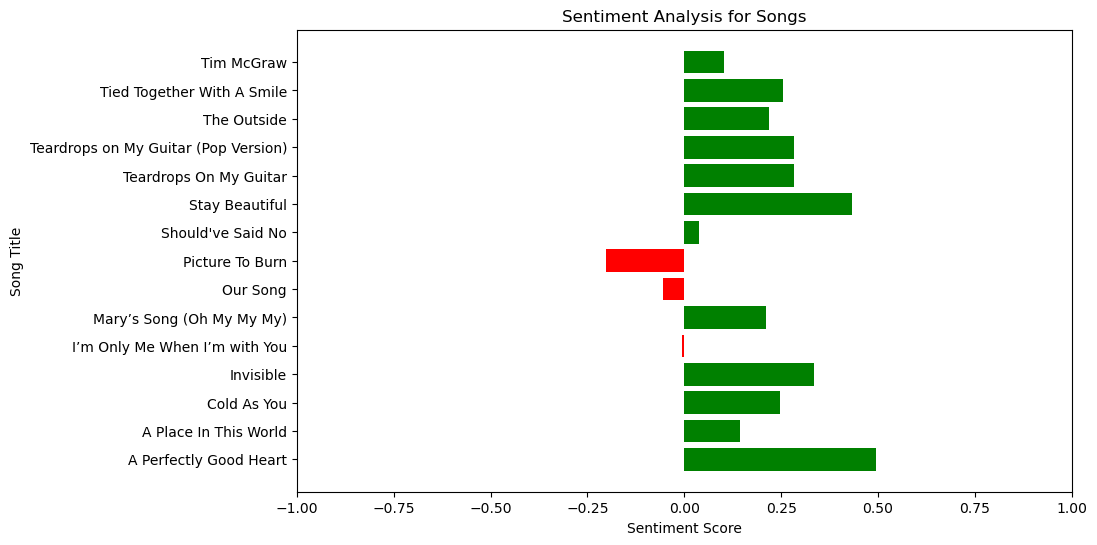

In [341]:
# Call the sentiment analysis function
titles, scores = sentiment_analysis_for_songs(taylor_swift)

# Call the function to create the bar chart
create_sentiment_bar_chart(titles, scores)

<h4> Fearless </h4>

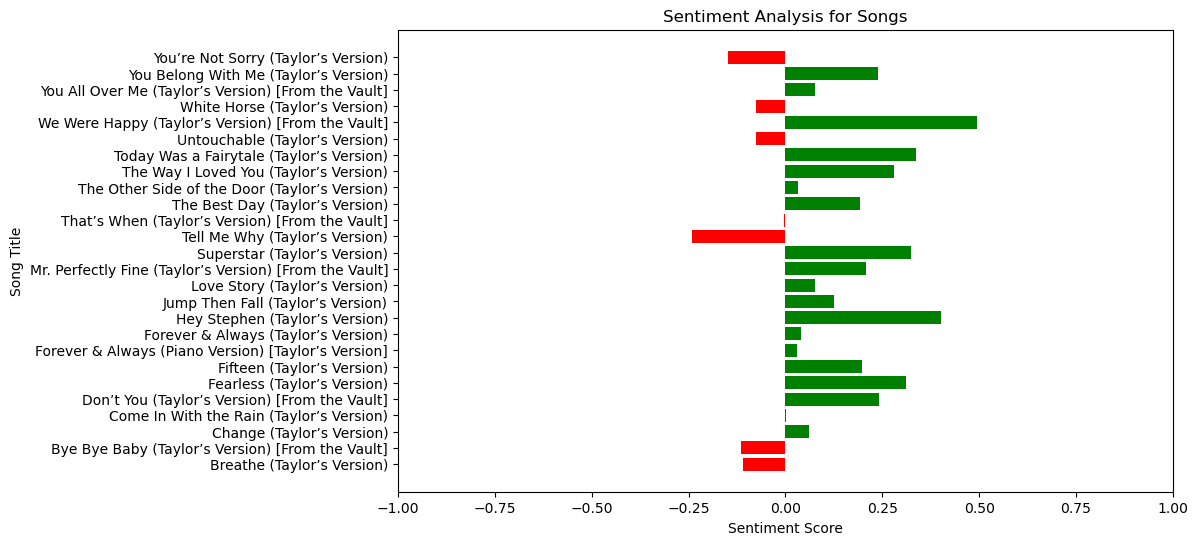

In [342]:
titles, scores = sentiment_analysis_for_songs(fearless)
create_sentiment_bar_chart(titles, scores)

<h4> Speak Now </h4>

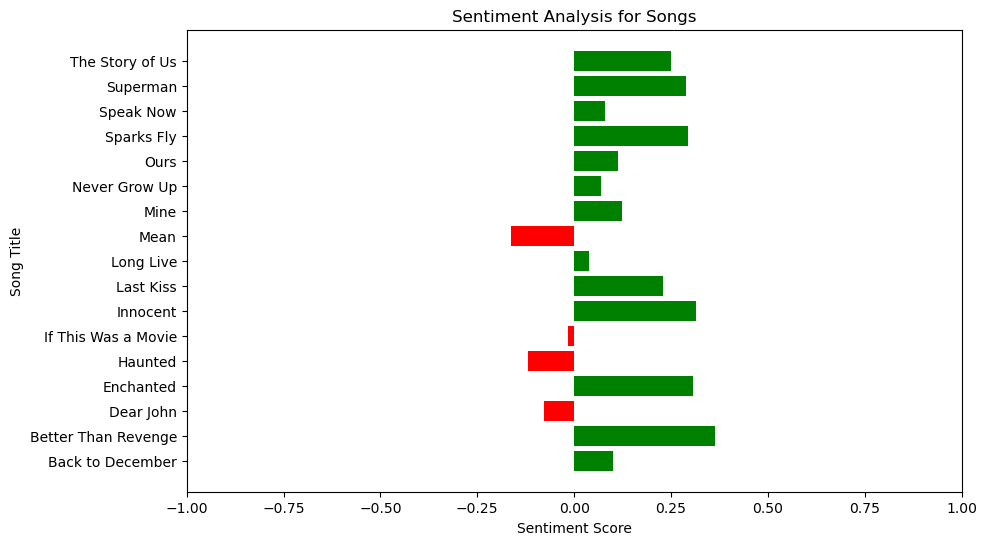

In [343]:
titles, scores = sentiment_analysis_for_songs(speak_now)
create_sentiment_bar_chart(titles, scores)

<h4> Red </h4>

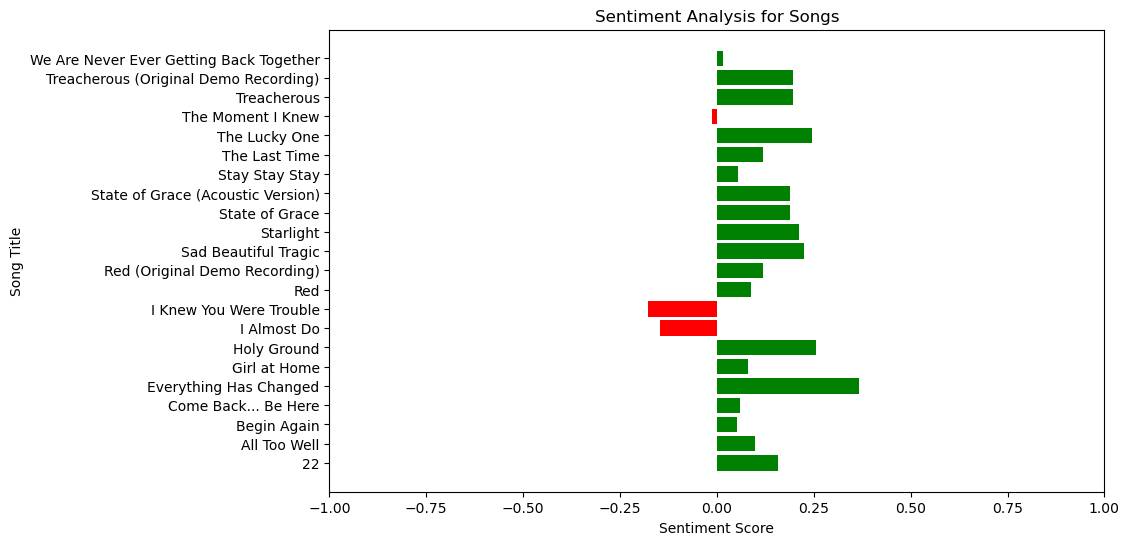

In [344]:
titles, scores = sentiment_analysis_for_songs(red)
create_sentiment_bar_chart(titles, scores)

<h4> 1989 </h4>

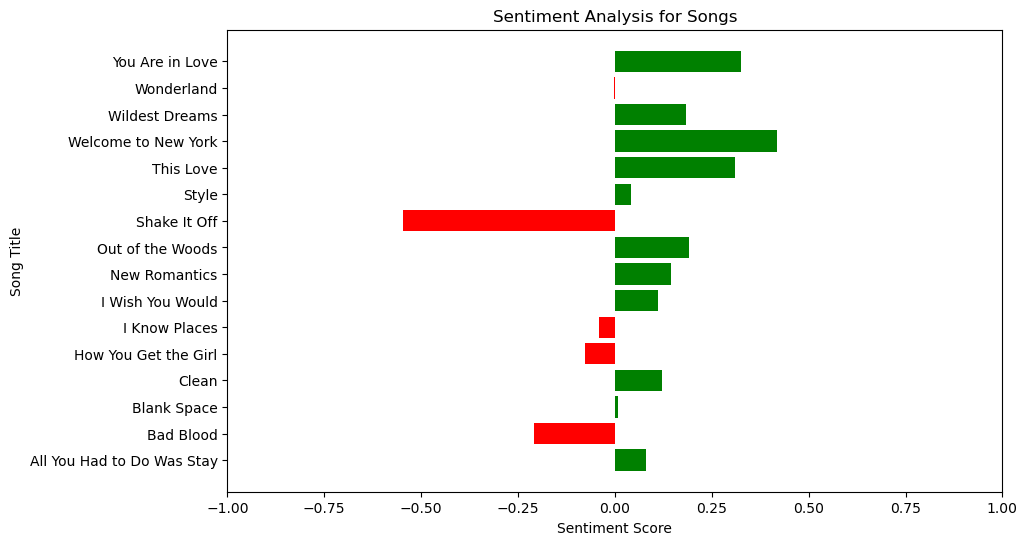

In [345]:
titles, scores = sentiment_analysis_for_songs(nineteen_eighty_nine)
create_sentiment_bar_chart(titles, scores)

<h4> reputation </h4>

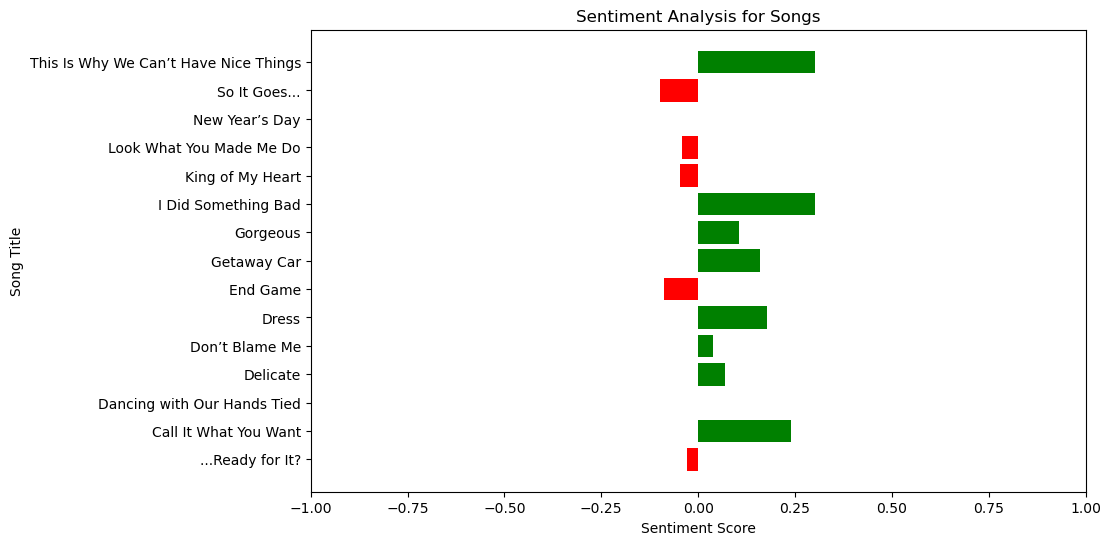

In [346]:
titles, scores = sentiment_analysis_for_songs(reputation)
create_sentiment_bar_chart(titles, scores)

<h4> Lover </h4>

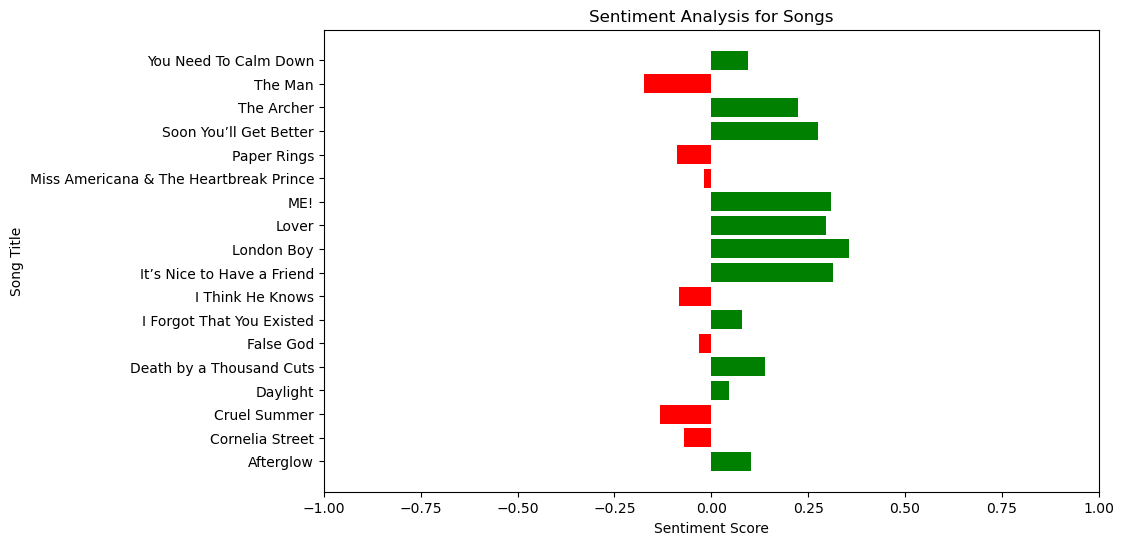

In [347]:
titles, scores = sentiment_analysis_for_songs(lover)
create_sentiment_bar_chart(titles, scores)

<h4> folklore </h4>

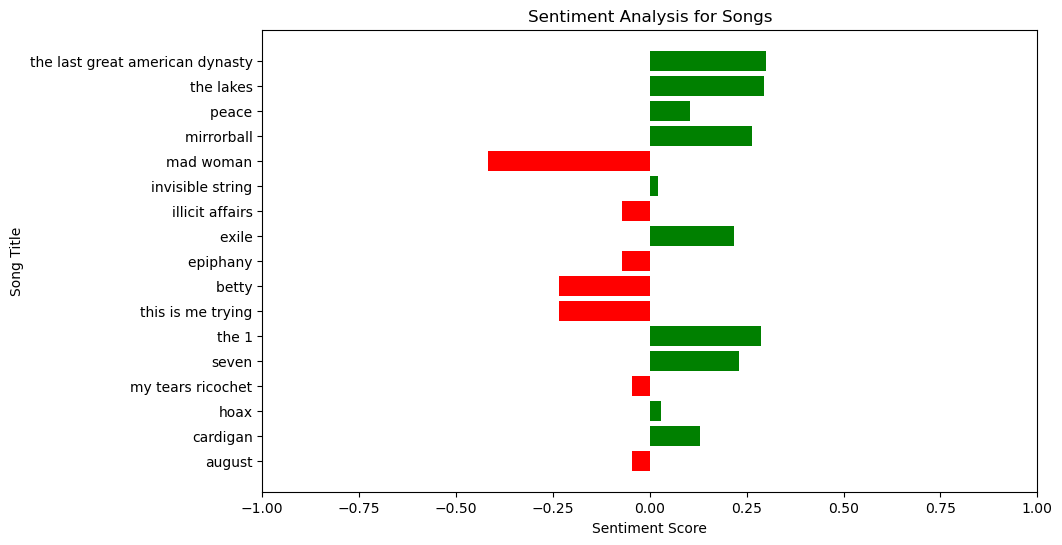

In [348]:
titles, scores = sentiment_analysis_for_songs(folklore)
create_sentiment_bar_chart(titles, scores)

<h4> evermore </h4>

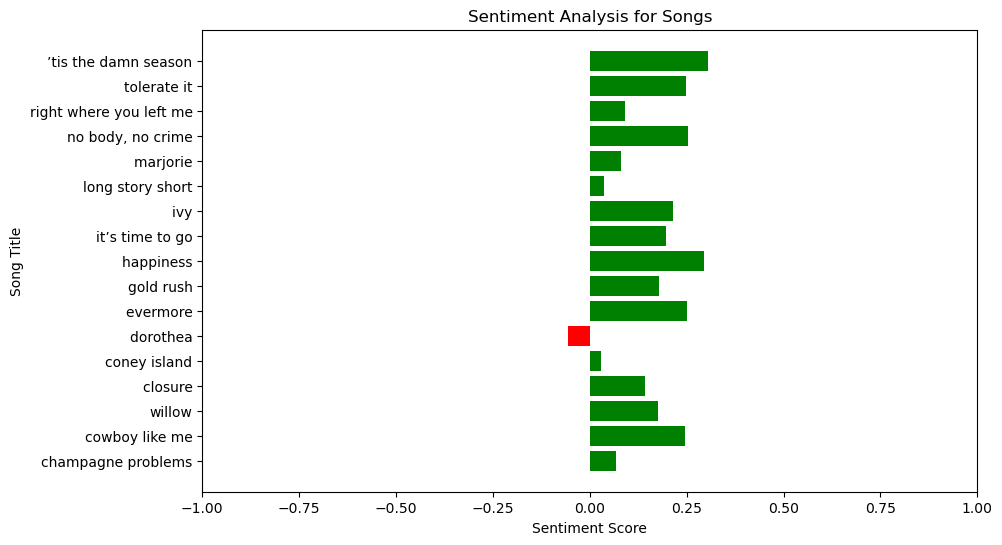

In [349]:
titles, scores = sentiment_analysis_for_songs(evermore)
create_sentiment_bar_chart(titles, scores)

<h3> The problem! The program analyses the sentiment of each word individually, but does not take into account the words in their linguistic context (e.g. the words around that word), or the tone they are said in (e.g. sarcasm) </h3>
<h4> What we say is not always what we mean. Our words can mean different things depending on the context we say them in (pragmatics). Here is an example using one of Taylor's songs called Soon You'll Get Better. This song is about someone close to Taylor being ill. </h4>

In [350]:
""" Here is a function to person a sentiment analysis on just one song, looking at the sentiment of each line individually, so we can see where
 the sentiment analysis is getting this sentiment from """
def sentiment_analysis_for_song(df, song_title):
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a DataFrame.")

    song_df = df[df['track_title'] == song_title]  # selects all rows from the DataFrame df where the 'track_title' matches the specified song_title
    if song_df.empty:
        raise ValueError("Song not found in the DataFrame.")

    sentiments = []
    for index, row in song_df.iterrows(): # this goes line by line through the specified song and performs sentiment analysis on each line
        lyric = row['lyric']
        blob = TextBlob(lyric)
        sentiment_score = blob.sentiment.polarity
        if sentiment_score > 0.2:
            sentiment = 'positive'
        elif sentiment_score < -0.2:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'
        sentiments.append((song_title, lyric, sentiment, sentiment_score))
    return sentiments


# Specify the song title
song_title = "Soon You’ll Get Better"

# Perform sentiment analysis for the specified song
song_sentiments = sentiment_analysis_for_song(lover, song_title)

# Print sentiment analysis results for each line of the specified song
for title, lyric, sentiment, score in song_sentiments:
    print(f"Track Title: {title} | Lyric: {lyric} | Sentiment: {sentiment} | Score: {score:.2f}")

Track Title: Soon You’ll Get Better | Lyric: button coat tangled hair | Sentiment: neutral | Score: 0.00
Track Title: Soon You’ll Get Better | Lyric: doctor office lighting tell scared | Sentiment: neutral | Score: 0.00
Track Title: Soon You’ll Get Better | Lyric: first time | Sentiment: positive | Score: 0.25
Track Title: Soon You’ll Get Better | Lyric: holy orange bottle night pray | Sentiment: neutral | Score: 0.00
Track Title: Soon You’ll Get Better | Lyric: desperate people find faith pray jesus | Sentiment: negative | Score: -0.60
Track Title: Soon You’ll Get Better | Lyric: say | Sentiment: neutral | Score: 0.00
Track Title: Soon You’ll Get Better | Lyric: oohah | Sentiment: neutral | Score: 0.00
Track Title: Soon You’ll Get Better | Lyric: soon youll get better | Sentiment: positive | Score: 0.50
Track Title: Soon You’ll Get Better | Lyric: oohah | Sentiment: neutral | Score: 0.00
Track Title: Soon You’ll Get Better | Lyric: soon youll get better | Sentiment: positive | Score: 

<h5> As we can see by this line-by-line analysis, the most positive lyric repeats multiple times in the chorus, and is the line "soon you'll get better". Although it is clear why this has been evaluated to have a positive sentiment - something getter better is usually a good thing! - the sentiment analysis has failed to see the context this is being used in. Taylor does not know that this person will get better, and despite the declarative sentence that she is using, she does not really mean this as a fact. She is pleading to some higher power for this person to get better because she can't bear the thought of them not doing. But this sentiment analysis does not recognise the desperation and denial behind the sentence, but instead just takes the words at face value </h5>

<h3> Despite the problems with this sentiment analysis, I wanted to compare how the 'sentiments' vary between albums to practice visualising data </h3>

In [351]:
# this joins all the lyrics each album into single strings so they can be analysed as a whole.
all_albums = ' '.join(all_albums['lyric'].astype(str))
taylor_swift = ' '.join(taylor_swift['lyric'].astype(str))
fearless = ' '.join(fearless['lyric'].astype(str))
speak_now = ' '.join(speak_now['lyric'].astype(str))
red = ' '.join(red['lyric'].astype(str))
nineteen_eighty_nine = ' '.join(nineteen_eighty_nine['lyric'].astype(str))
reputation = ' '.join(reputation['lyric'].astype(str))
lover = ' '.join(lover['lyric'].astype(str))
folklore = ' '.join(folklore['lyric'].astype(str))
evermore = ' '.join(evermore['lyric'].astype(str))

In [352]:
""""
This function is similar to the previous function, except it performs sentiment analysis on the albums as a whole, instead of individial songs,
and instead of separating them into playlists, simply assigns them a sentiment.
"""
def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0.2:
        sentiment = 'positive'
    elif sentiment_score < -0.2:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    return sentiment, sentiment_score

#Prints the sentiment and specific score of each album
sentiment, score = sentiment_analysis(all_albums)
print(f"Sentiment: {sentiment} | Score: {score:.2f}")
sentiment, score = sentiment_analysis(taylor_swift)
print(f"Sentiment: {sentiment} | Score: {score:.2f}")
sentiment, score = sentiment_analysis(fearless)
print(f"Sentiment: {sentiment} | Score: {score:.2f}")
sentiment, score = sentiment_analysis(speak_now)
print(f"Sentiment: {sentiment} | Score: {score:.2f}")
sentiment, score = sentiment_analysis(red)
print(f"Sentiment: {sentiment} | Score: {score:.2f}")
sentiment, score = sentiment_analysis(nineteen_eighty_nine)
print(f"Sentiment: {sentiment} | Score: {score:.2f}")
sentiment, score = sentiment_analysis(reputation)
print(f"Sentiment: {sentiment} | Score: {score:.2f}")
sentiment, score = sentiment_analysis(lover)
print(f"Sentiment: {sentiment} | Score: {score:.2f}")
sentiment, score = sentiment_analysis(folklore)
print(f"Sentiment: {sentiment} | Score: {score:.2f}")
sentiment, score = sentiment_analysis(evermore)
print(f"Sentiment: {sentiment} | Score: {score:.2f}")

Sentiment: neutral | Score: 0.11
Sentiment: neutral | Score: 0.16
Sentiment: neutral | Score: 0.12
Sentiment: neutral | Score: 0.11
Sentiment: neutral | Score: 0.12
Sentiment: neutral | Score: 0.11
Sentiment: neutral | Score: 0.08
Sentiment: neutral | Score: 0.07
Sentiment: neutral | Score: 0.05
Sentiment: neutral | Score: 0.16


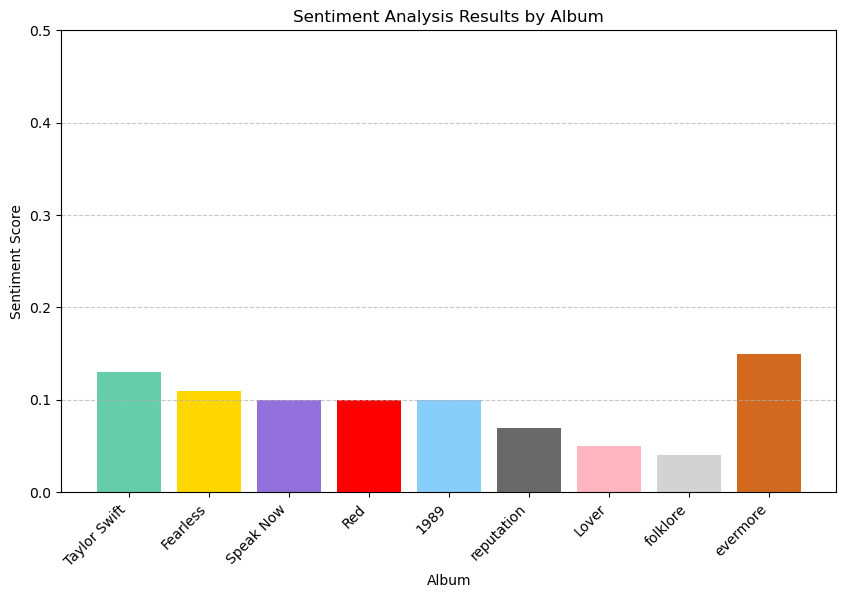

In [353]:
# list of tuples containing the result of the sentiment analysis (album name, sentiment score)
results = [
    ('Taylor Swift', 0.13),
    ('Fearless', 0.11),
    ('Speak Now', 0.10),
    ('Red', 0.10),
    ('1989', 0.10),
    ('reputation', 0.07),
    ('Lover', 0.05),
    ('folklore', 0.04),
    ('evermore', 0.15)
]

# colours that the bars in the barchart will be 
colors = ['mediumaquamarine', 'gold', 'mediumpurple', 'red', 'lightskyblue',
          'dimgrey', 'lightpink', 'lightgray', 'chocolate']


# 'unzips' the tuples into separate lists and assigns them to the variables 'albums' and 'scores'
albums, scores = zip(*results)

# Plots bar chart with these variables
plt.figure(figsize=(10, 6))
plt.bar(albums, scores, color=colors)
plt.xlabel('Album')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Results by Album')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 0.5)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h5> This tells us that evermore is her most positive album, while folklore is her least positive album, although in light of the flaws of the sentiment analysis, this should be taken with a pinch of salt </h5>

<h2> Word Clouds! </h2>

<h3> Just for fun, another way of visualising data is wordclouds. <br>
Here, I make wordclouds of the most commonly occuring words in all Taylor Swift albums combined, and then each one individually. I also play around with the colour schemes (matplotlib colormaps), the shapes of the word clouds (masks), and adding contours. </h3>

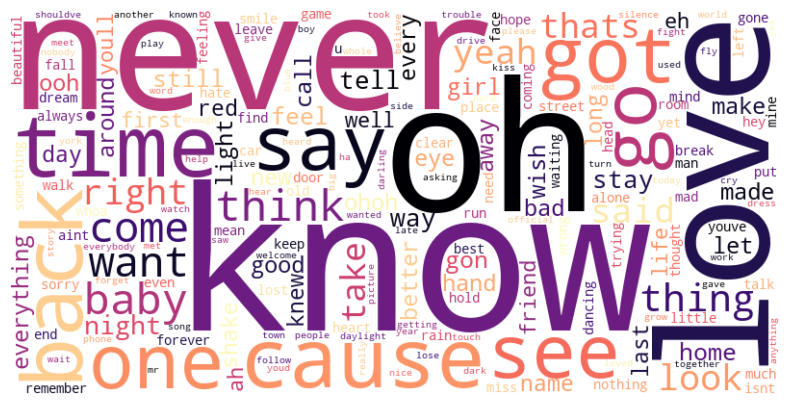

In [354]:
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='magma').generate(all_albums)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h5> This tells us the themes that Taylor sings about the most, including: <br>
- Love <br>
- Time <br>
- Verbs of Cognition ("know", "think", "remember) </br>
- "see", "say", "said"  </br>
She recounts events from her perspective, meaning an analysis of her lyrics can provide us with an idea of her worldview 
</h5>

<h3> Taylor Swift </h3>

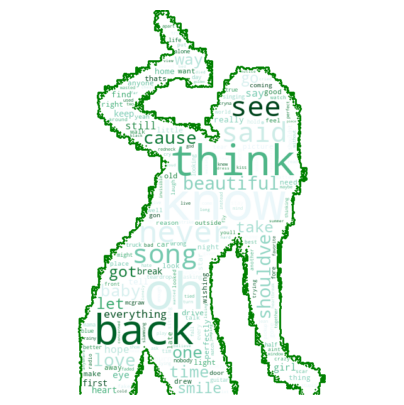

In [355]:
taylor_swift_mask = np.array(Image.open(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\taylor swift.png"))
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='BuGn', mask=taylor_swift_mask, contour_width=2, contour_color='green').generate(taylor_swift)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3>Fearless</h3>

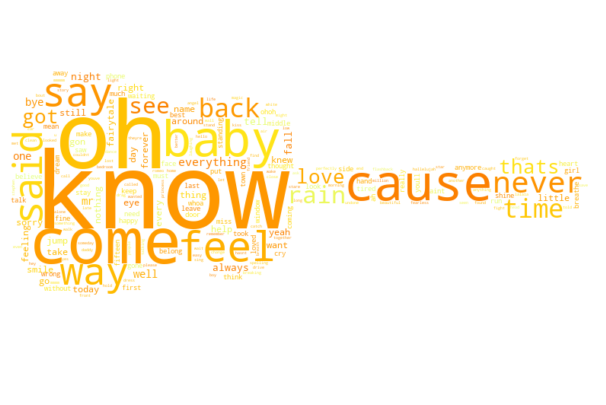

In [356]:
fearless_mask = np.array(Image.open(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\guitar.png"))
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='Wistia', mask=fearless_mask).generate(fearless)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3>Speak Now</h3>

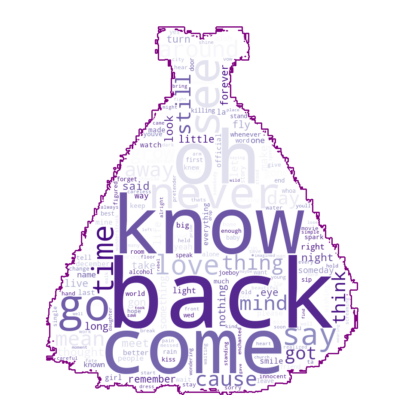

In [357]:
speak_now_mask = np.array(Image.open(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\speak now.png"))
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='Purples', mask=speak_now_mask, contour_color ='purple', contour_width=2).generate(speak_now)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3>Red</h3>

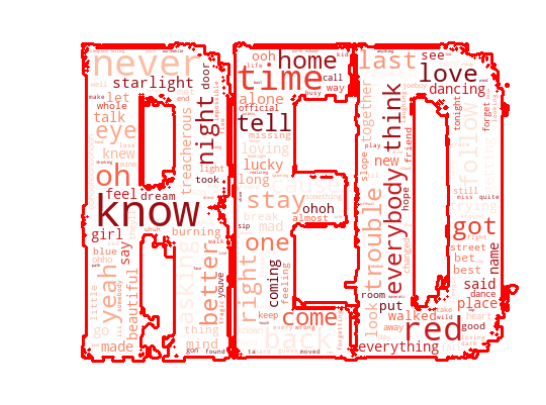

In [358]:
red_mask = np.array(Image.open(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\red.png"))
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='Reds', mask=red_mask, contour_width=2, contour_color = 'red').generate(red)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3>1989</h3>

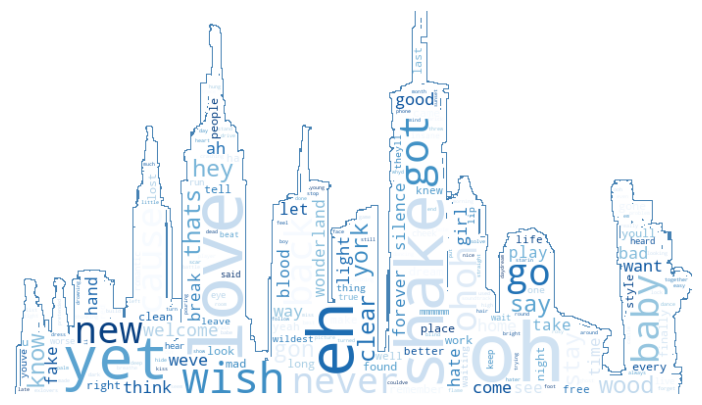

In [359]:
nineteen_eighty_nine_mask = np.array(Image.open(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\1989.png"))
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='Blues', mask = nineteen_eighty_nine_mask, contour_color='steelblue', contour_width=1).generate(nineteen_eighty_nine)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3>reputation</h3>

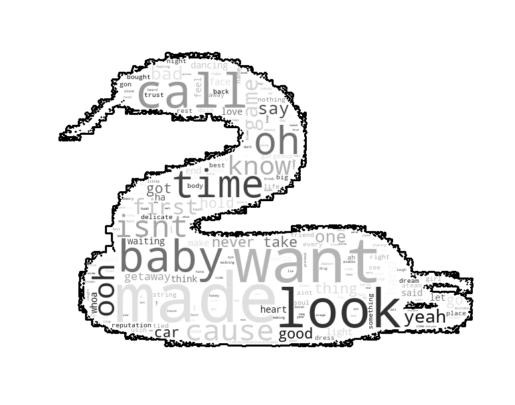

In [360]:
reputation_mask = np.array(Image.open(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\reputation.png"))
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='binary', mask=reputation_mask, contour_color='black', contour_width=2).generate(reputation)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

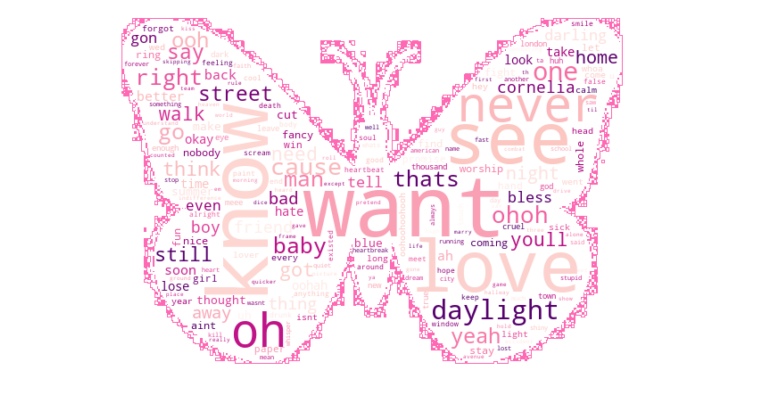

In [361]:
lover_mask = np.array(Image.open(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\lover.png"))
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='RdPu_r', mask=lover_mask, contour_color='hotpink', contour_width=1).generate(lover)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

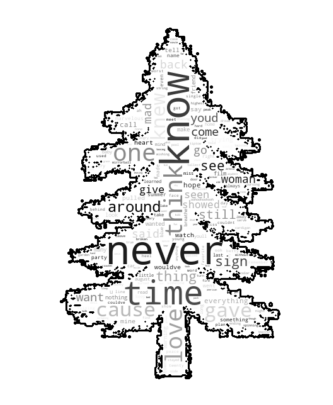

In [362]:
folklore_mask = np.array(Image.open(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\folklore.png"))
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='gray', mask = folklore_mask, contour_color='black', contour_width=2).generate(folklore)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

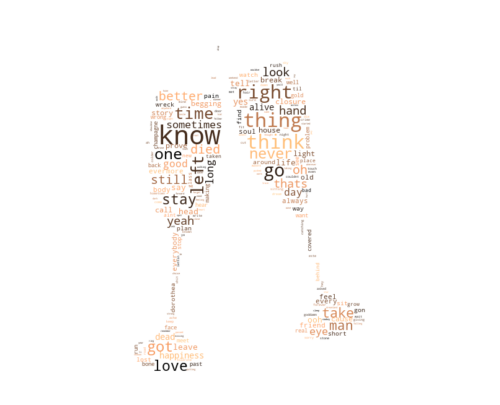

In [363]:
evermore_mask = np.array(Image.open(r"C:\Users\loisa\OneDrive\Coding\CODE Lancashire\CODE Lancashire Python\My Python\evermore.png"))
wordcloud = WordCloud(width=800, height=400, background_color='white', mask = evermore_mask, collocations=False, colormap='copper').generate(evermore)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()